<h1><center>Deep Learning</center></h1>
<h2><center>Assignment # 2</center></h2>
<h3><center>Task # 1</center></h3>

In [2]:
# Include libraries which may use in implementation
import numpy as np
import random
import matplotlib.pyplot as plt
import sklearn.model_selection as sk
from sklearn.metrics import confusion_matrix
import pickle
%matplotlib inline


In [72]:
# Create a Neural_Network class
class Neural_Network(object):    
    def __init__(self,inputSize = 2,outputSize = 1 ):        
        # size of layers
        self.inputSize = inputSize
        self.outputSize = outputSize    
        #weights
        #self.W1 = np.array([[0.5],[0.5],[1]])
        self.W1 = np.random.rand(self.inputSize + 1, self.outputSize) #? # randomly initialize W1 using random function of numpy
        # size of the wieght will be (inputSize +1, outputSize) that +1 is for bias 
        

    def feedforward(self, X): #forward propagation through our network
        #print("inside feedforward")
        #print(len(X))
        # This chunk will be used When finding accuracy, will predict all examples in vectorized fashion
        if X.size > self.inputSize:
            #print("Testing")
            no_of_training_examples = len(X)
            weights = []
            biases = []
            for i in range(no_of_training_examples):
                weight_vector = [self.W1[0][0], self.W1[1][0]]
                weights.append(weight_vector)
                biases.append(self.W1[2][0])
            z = np.multiply(weights, X).sum(1) + biases
            a = self.sigmoid(z)
            return a
   
        weight_vector = [self.W1[0][0], self.W1[1][0]]
        z = np.dot(weight_vector, X) + self.W1[2] # dot product of X (input) and set of weights
        #print(z)
        a = self.sigmoid(z) # apply activation function (i.e. sigmoid) 
        #print(a)
        #print("leaving feedforward")
        return a    #? # return your answer with as a final output of the network

    def sigmoid(self, s): # activation function
        return (1/(1+np.exp(-s))) #? # apply sigmoid function on s and return it's value

    def sigmoid_derivative(self, s): #derivative of sigmoid
        return self.sigmoid(s)*(1-self.sigmoid(s)) #? # apply derivative of sigmoid on s and return it's value 

    def backwardpropagate(self,X, Y, y_pred, lr):
        # backward propagate through the network
        # compute error in output which is loss compute cross entropy loss function
        Loss = self.crossentropy(Y,y_pred)
        dL_wrt_weights = np.multiply(np.subtract(y_pred ,Y) , X)
        w_grad =[]
        for entry in dL_wrt_weights:
            w_grad.append([entry])
        dL_wrt_bias = y_pred - Y
        self.W1[0:2] = np.subtract(self.W1[0:2] , np.multiply(lr,w_grad)) # adjust set of weights
        self.W1[2] = np.subtract(self.W1[2] , np.multiply(lr,dL_wrt_bias))
        #print(self.W1)
        return Loss
        
        # applying derivative of sigmoid to the error

    def crossentropy(self, Y, Y_pred): # compute error based on crossentropy loss 
        L = -( np.multiply(Y,np.log(Y_pred)) + np.multiply(1-Y,np.log(1-Y_pred))  )
        return L #? #error

    def train(self, trainX, trainY,epochs = 1, learningRate = 0.001, plot_err = True ,validationX = 'NULL', validationY = 'NULL'):
        Loss =[]
        Train_Accuracy = []
        Valid_Accuracy = []
        epochs_list=[]
        for epoch in range(epochs):
            Loss_in_one_epoch = 0.0
            epochs_list.append(epoch)
            for i in range(len(trainX)):
                # feed forward trainX and trainY and recivce predicted value
                Y_predicted = self.feedforward(trainX[i]) 
                # backpropagation with trainX, trainY, predicted value and learning rate.
                loss = self.backwardpropagate(trainX[i], trainY[i], Y_predicted, learningRate) 
                Loss_in_one_epoch = Loss_in_one_epoch + loss
            
            ### calculating loss ###
            Loss_in_one_epoch = Loss_in_one_epoch / len(trainX)
            Loss.append(Loss_in_one_epoch)
            ### calculating accuracy ###
            train_accuracy = self.accuracy(trainX,trainY)
            Train_Accuracy.append(train_accuracy)
            
            print("At epoch ",epoch, "loss is: ", Loss_in_one_epoch, "accuracy is: ", train_accuracy)
            # if validationX and validationY are not null than show validation accuracy and error of the model.
            if validationX != 'NULL':
                valid_accuracy = self.accuracy(validationX,validationY)
                print("At epoch ",epoch, "validation accuracy is ", valid_accuracy)
                Valid_Accuracy.append(valid_accuracy)
        
        # plot error of the model if plot_err is true
        if plot_err:
            plt.plot(epochs_list,Loss,'bo')
            plt.xlabel('epoch number')
            plt.ylabel('Cross Entropy loss')
            plt.show()
            plt.plot(epochs_list,Train_Accuracy)
            plt.xlabel('epoch number')
            plt.ylabel('Training Accuracy')
            plt.show()
            if validationX != 'NULL':
                plt.plot(epochs_list,Valid_Accuracy)
                plt.xlabel('epoch number')
                plt.ylabel('Validation Accuracy')
                plt.show()

    def predict(self, testX): # predict the value of testX
        predicted_test_values = self.feedforward (testX)
        predY= []
        for i in range(len(predicted_test_values)):
            if predicted_test_values[i] >= 0.5:
                predY.append(1)
            if predicted_test_values[i] < 0.5:
                predY.append(0)
        return predY
        
        #pass
    
    def accuracy(self, testX, testY, test=False): 
        pred_y = self.predict(testX) # predict the value of testX
       
        # compare it with testY
        accuracy = float(np.sum(pred_y == testY))/len(testY)
        # compute accuracy, print it and show in the form of picture
        if test:
            bar_label = ['Testing Accuracy']
            bar_index = np.arange(len(bar_label))
            plt.bar(bar_index,accuracy)
            #plt.xlabel('Testing')
            #plt.ylabel('Accuracy')
            plt.xticks(bar_index, bar_label, fontsize=10, rotation=0)
            plt.show()
            #plt.plot(accuracy)
        '''
        class_labels = ['0', '1']
        cnf_mat = confusion_matrix(testY, predY)
        plt.imshow(cnf_mat, cmap=plt.cm.Blues)#, interpolation='nearest'), cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.colorbar()
        tick_marks = np.arange(len(class_labels))
        plt.xticks(tick_marks, class_labels)#, rotation=45)
        plt.yticks(tick_marks, class_labels)
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
        '''
        return accuracy #? # return accuracy    
        
    def saveModel(self,name):
        pickle.dump(self, open(name, 'wb'))
        # save your trained model, it is your interpretation how, which and what data you store
        # which you will use later for prediction
        #pass

        
    def loadModel(self,name):
        #new_model = pickle.load(open(name, 'rb'))
        #mm = new_model
        return pickle.load(open(name, 'rb'))
        # load your trained model, load exactly how you stored it.
        #pass

    


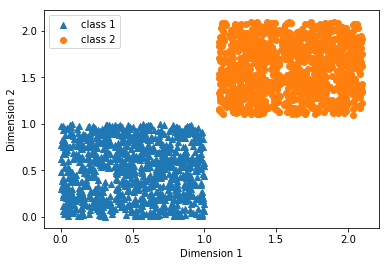

In [48]:
# generating dataset point
np.random.seed(1)
no_of_samples = 1000
dims = 2
#Generating random points of values between 0 to 1
class1=np.random.rand(no_of_samples,dims)
#To add separability we will add a bias of 1.1
class2=np.random.rand(no_of_samples,dims)+1.1
class_1_label=np.array([1 for n in range(no_of_samples)])
class_2_label=np.array([0 for n in range(no_of_samples)])
#Lets visualize the dataset
plt.scatter(class1[:,0],class1[:,1], marker='^', label="class 1")
plt.scatter(class2[:,0],class2[:,1], marker='o', label="class 2")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='best')
plt.show()

In [49]:
# Data concatenation
data = np.concatenate((class1,class2),axis=0)
label = np.concatenate((class_1_label,class_2_label),axis=0)

#Note: shuffle this dataset before dividing it into three parts
# Distribute this data into three parts i.e. training, validation and testing
train_X, testX, train_Y, testY =  sk.train_test_split(data,label,test_size=0.2, shuffle=True,stratify=label) #?# training data point
trainX, validX, trainY, validY = sk.train_test_split(train_X,train_Y,test_size=0.25, shuffle=True,stratify=train_Y)

At epoch  0 loss is:  [0.51183431] accuracy is:  0.9633333333333334
At epoch  0 validation accuracy is  0.965
At epoch  1 loss is:  [0.29427718] accuracy is:  0.9941666666666666
At epoch  1 validation accuracy is  0.9975
At epoch  2 loss is:  [0.22089289] accuracy is:  1.0
At epoch  2 validation accuracy is  1.0


c:\python36\lib\site-packages\ipykernel_launcher.py:87: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


At epoch  3 loss is:  [0.17883996] accuracy is:  1.0
At epoch  3 validation accuracy is  1.0
At epoch  4 loss is:  [0.15160161] accuracy is:  1.0
At epoch  4 validation accuracy is  1.0
At epoch  5 loss is:  [0.13246526] accuracy is:  1.0
At epoch  5 validation accuracy is  1.0
At epoch  6 loss is:  [0.11823508] accuracy is:  1.0
At epoch  6 validation accuracy is  1.0
At epoch  7 loss is:  [0.10720334] accuracy is:  1.0
At epoch  7 validation accuracy is  1.0
At epoch  8 loss is:  [0.09837571] accuracy is:  1.0
At epoch  8 validation accuracy is  1.0
At epoch  9 loss is:  [0.09113386] accuracy is:  1.0
At epoch  9 validation accuracy is  1.0


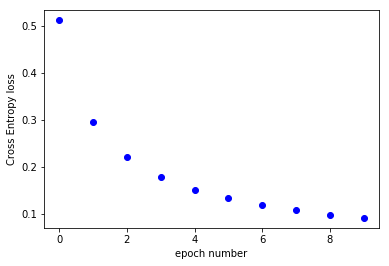

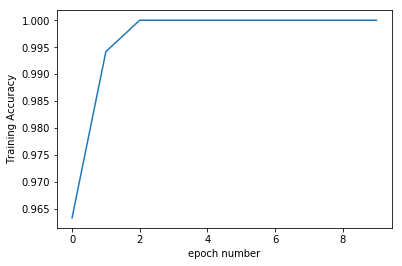

c:\python36\lib\site-packages\ipykernel_launcher.py:102: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


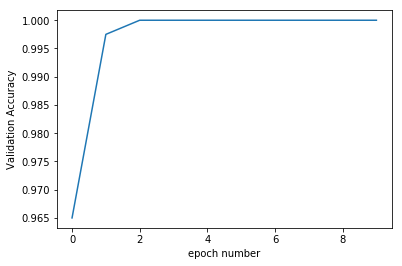

In [75]:
model = Neural_Network(2,1)
# try different combinations of epochs and learning rate
model.train(trainX, trainY, epochs = 10, learningRate = 0.01, validationX = validX, validationY = validY)

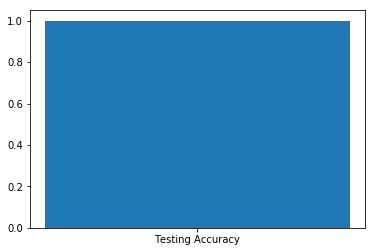

1.0

In [76]:
accuracy = model.accuracy(testX,testY,test=True)
accuracy

In [79]:
#save the best model which you have trained, 
#model.save('bestmodel.mdl')
model.saveModel('task1_bestmodel.mdl')

#### Note: This below section will be used for the evaluation of this task, we need your model and we will run script below to evaluated your model

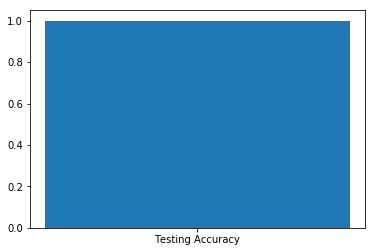

1.0

In [81]:
# create class object
mm = Neural_Network()
# load model which will be provided by you
#mm.load('bestmodel.mdl')
loaded_model = mm.loadModel('task1_bestmodel.mdl')
# check accuracy of that model
loaded_model.accuracy(testX,testY,test=True)




In [116]:
a =[[1,2,3], [1,0,3]]
b = [[3,4,2], [1,1,2]]

In [117]:
np.prod([a,b], axis = 0)

array([[3, 8, 6],
       [1, 0, 6]])

In [118]:
np.add(a,b)

array([[4, 6, 5],
       [2, 1, 5]])

In [119]:
np.sum(a)

10

In [120]:
np.dot(a,b)

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

In [138]:
a = [1,2]
b = [2,3]
np.subtract(a,b)

array([-1, -1])